In [578]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

  
#run solver
fh=os.path.expanduser('~')
i=0
jobDir=os.path.join(fh,'temp','humanHG')
#jobDir=os.path.join(fh,'temp','humanHG_withHairPC')
jobDir=os.path.join(fh,'temp','humanHGplusI')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC_parameters.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
if i>0: 
    targetDir=jobDir+'{}'.format(i)
else:
    targetDir=jobDir
if i==1:
    srcDir=jobDir
if i>1:
    srcDir=jobDir+'{}'.format(i-1)

if not os.path.isdir(targetDir):
    os.mkdir(targetDir)
    
setupFileSrc=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
setupFile=os.path.join(targetDir,'setupFast.json')

with open(setupFileSrc,'r') as f:
    setup=json.load(f)
setup['tmax']=i+1
with open(setupFile,'w+') as f:
    f.write(json.dumps(setup))
    
if i>0:
    runSolver.main([setupFile,modelFile,parameterFile],targetDir,srcDir)
if i==0:
    runSolver.main([setupFile,modelFile,parameterFile],targetDir)

testDir=os.path.join(fh,'temp','jobDir')
setupFile=os.path.join(testDir,'setup.json')
setup=runSolver.parseSetup(setupFile)
scale=runSolver.getScale(setup)
tmax=setup['tmax']*scale
print('strides {}'.format(runSolver.getStrides(setup)))
inFiles=runSolver.getFiles(setup,True)
print('inFiles {}'.format(len(inFiles)))
#t0,y0,S1,lut,lutSE=runSolver.getStartPoint(setup)


Using /home/studen/temp/humanHG
Done simultaneous LSODA SE
Time: 3.055 s
Completed step 
Completed run
strides [{'length': 21600.0, 'label': '_step000'}, {'length': 21600.0, 'label': '_step001'}, {'length': 21600.0, 'label': '_step002'}, {'length': 21600.0, 'label': '_step003'}, {'length': 21600.0, 'label': '_step004'}, {'length': 21600.0, 'label': '_step005'}, {'length': 21600.0, 'label': '_step006'}, {'length': 21600.0, 'label': '_step007'}, {'length': 21600.0, 'label': '_step008'}, {'length': 21600.0, 'label': '_step009'}, {'length': 21600.0, 'label': '_step010'}, {'length': 21600.0, 'label': '_step011'}, {'length': 21600.0, 'label': '_step012'}, {'length': 21600.0, 'label': '_step013'}, {'length': 21600.0, 'label': '_step014'}, {'length': 21600.0, 'label': '_step015'}, {'length': 21600.0, 'label': '_step016'}, {'length': 21600.0, 'label': '_step017'}, {'length': 21600.0, 'label': '_step018'}, {'length': 21600.0, 'label': '_step019'}, {'length': 21600.0, 'label': '_step020'}, {'leng

In [229]:
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
t,sol,se,sOut,qt,lut,lutSE,setup1=runSolver.loadSolutionFromDir(humanHG)
print(len(t))

201


In [ ]:
importlib.reload(cModel)
importlib.reload(ivp)
importlib.reload(runSolver)

model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFastStride.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
model.inspect()


***********done************
(16, 16)
22
Time: 0.714 s
[ 0.          0.          0.          0.          0.          0.
  0.          0.12434798 -0.00099998  0.          0.          0.
  0.          0.          0.          0.        ]


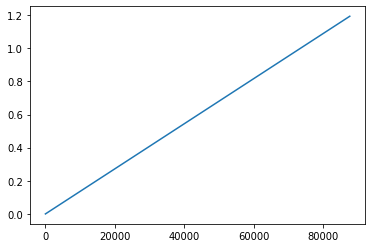

In [58]:
model=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
sys.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

sys.inspect()    

print("***********done************")
print(model.M(1).shape)
#print(sys.fSS(2))
print(model.m)

nt=setup['nt']
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
try:
    fw=model.get('fetusWeight')
    ft=[fw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ft)
except (KeyError,TypeError):
    pass

try:
    hw=model.get('hairVolume')
    ht=[10*hw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ht)
except (KeyError,TypeError):
    pass
start_time=time.time()
for i in range(100000):
    model.M(1e7)
end_time=time.time()
print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

Parsing [1/1]
Parsing [1/1]
60


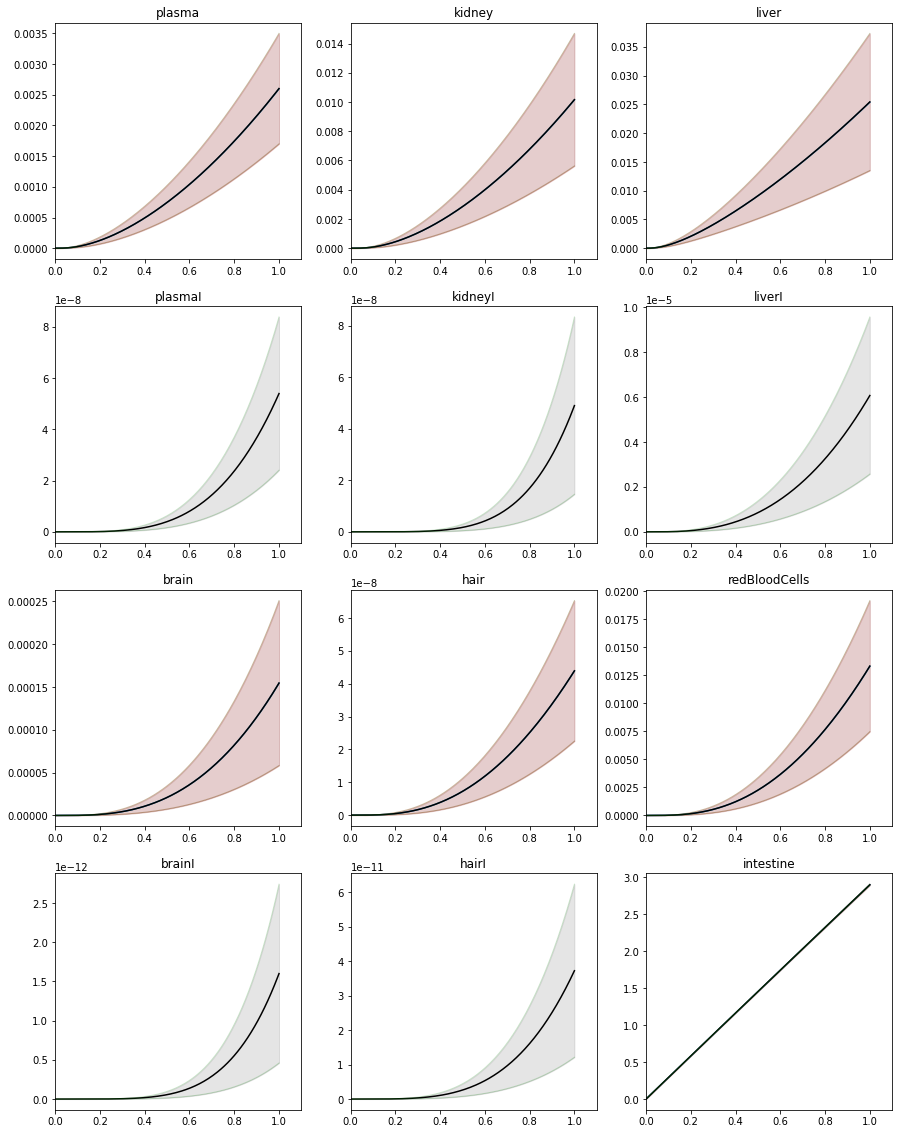

In [576]:
# #copy output of Thompson et al1
# merge solutions 
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
humanHG_withHairPC=os.path.join(fh,'temp','humanHG_withHairPC1')
t,sol,se,sOut,qt,lut,lutSE,setup0=runSolver.loadSolutionFromDir(humanHG,True)
t1,sol1,se1,sOut1,qt1,lut1,lutSE1,setup1=runSolver.loadSolutionFromDir(humanHGplusI,True)
fig, axs = matplotlib.pyplot.subplots(4, 3,figsize=(15,20))
name=['plasma','kidney','liver',
      'plasmaI','kidneyI','liverI',
      'brain','hair','redBloodCells',
     'brainI','hairI','intestine'
      ]

tscale=runSolver.getScale(setup1)
tmax=setup1['tmax']*tscale
print(tscale)
max=[-1]*len(name)
for i in range(len(name)):
    row=i//3
    col=i%3
    ax=axs[row,col]
    try:
        fy=sol[:,lut[name[i]]]
        fe=se[:,lut[name[i]]]
        ax.plot(t/tscale,fy)
        ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
        ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
        ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    except KeyError:
        pass
    try:
        fy1=sol1[:,lut1[name[i]]]
        fe1=se1[:,lut1[name[i]]]
        ax.plot(t1/tscale,fy1,color='black')
        ax.fill_between(t1/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
        ax.plot(t1/tscale,fy1-fe1,color='green',linewidth=1,alpha=0.2)
        ax.plot(t1/tscale,fy1+fe1,color='green',linewidth=1,alpha=0.2)
    except (NameError,KeyError):
        pass
    if max[i]>0:
        axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])
    axs[row,col].set_title(name[i])

In [446]:
model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_withHairPC_parameters.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
model.parse(modelFile,parameterFile)
t,sol,se,sOut,qt,lut,lutSE,setup1=runSolver.loadSolutionFromDir(targetDir)
compartment='hair'
#compartment='liverI'
d=model.getDerivatives(sOut,lut[compartment])
w=model.getWeights(lutSE)
w=numpy.ones((len(lutSE)))
print('Sum ({}, der, sigma_p)'.format(compartment))
s={x:d[lutSE[x]]*w[lutSE[x]] for x in lutSE}
s=dict(sorted(s.items(), key=lambda item:item[1],reverse=True))
for p in list(s)[:10]:
    j=lutSE[p]
    print('\t{:.2g} [{:.2g} {:.2g}] {} '.format(d[j]*w[j],d[j],w[j],p))

Sum (hair, der, sigma_p)
	4.5e-11 [4.5e-11 1] kRScaled 
	4.3e-11 [4.3e-11 1] liverInFlowFraction 
	3.3e-11 [3.3e-11 1] kHScaled 
	1.9e-11 [1.9e-11 1] gutFlowFraction 
	8.2e-12 [8.2e-12 1] bodyWeight 
	7.3e-12 [7.3e-12 1] slowlyPerfusedPC 
	5e-12 [5e-12 1] slowlyPerfusedVolumeFraction 
	1.2e-12 [1.2e-12 1] liverOutFlowFraction 
	1.1e-12 [1.1e-12 1] liverPC 
	8.8e-13 [8.8e-13 1] rbcPC 


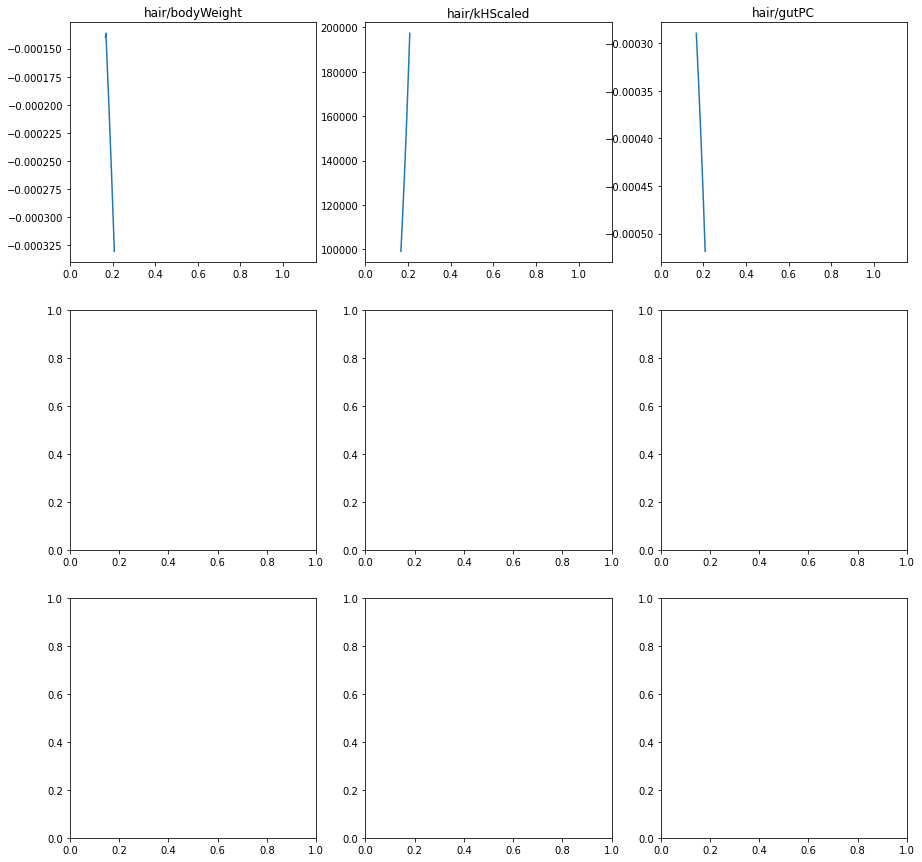

In [382]:
# #copy output of Thompson et al1
# merge solutions 
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
humanHG_withHairPC=os.path.join(fh,'temp','humanHG_withHairPC')
t,sol,se,sOut,qt,lut,lutSE,setup1=runSolver.loadSolutionFromDir(targetDir)
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,15))
cName=['liverI']
cName=['hair']
pName=['bodyWeight','kHScaled','gutPC']

tscale=scale
max=[-1]*len(name)
for row in range(len(cName)):
    for col in range(len(pName)):
        #row=i//3
        #col=i%3
        try:
            fy=sOut[:,lut[cName[row]],lutSE[pName[col]]]
        except KeyError:
            continue
        ax=axs[row,col]
        ax.plot(qt/tscale,fy)
        #if max[i]>0:
        #    axs[row,col].set_ylim([0,max[i]])
        axs[row,col].set_xlim([0,1.1*tmax/tscale])
        axs[row,col].set_title('{}/{}'.format(cName[row],pName[col]))

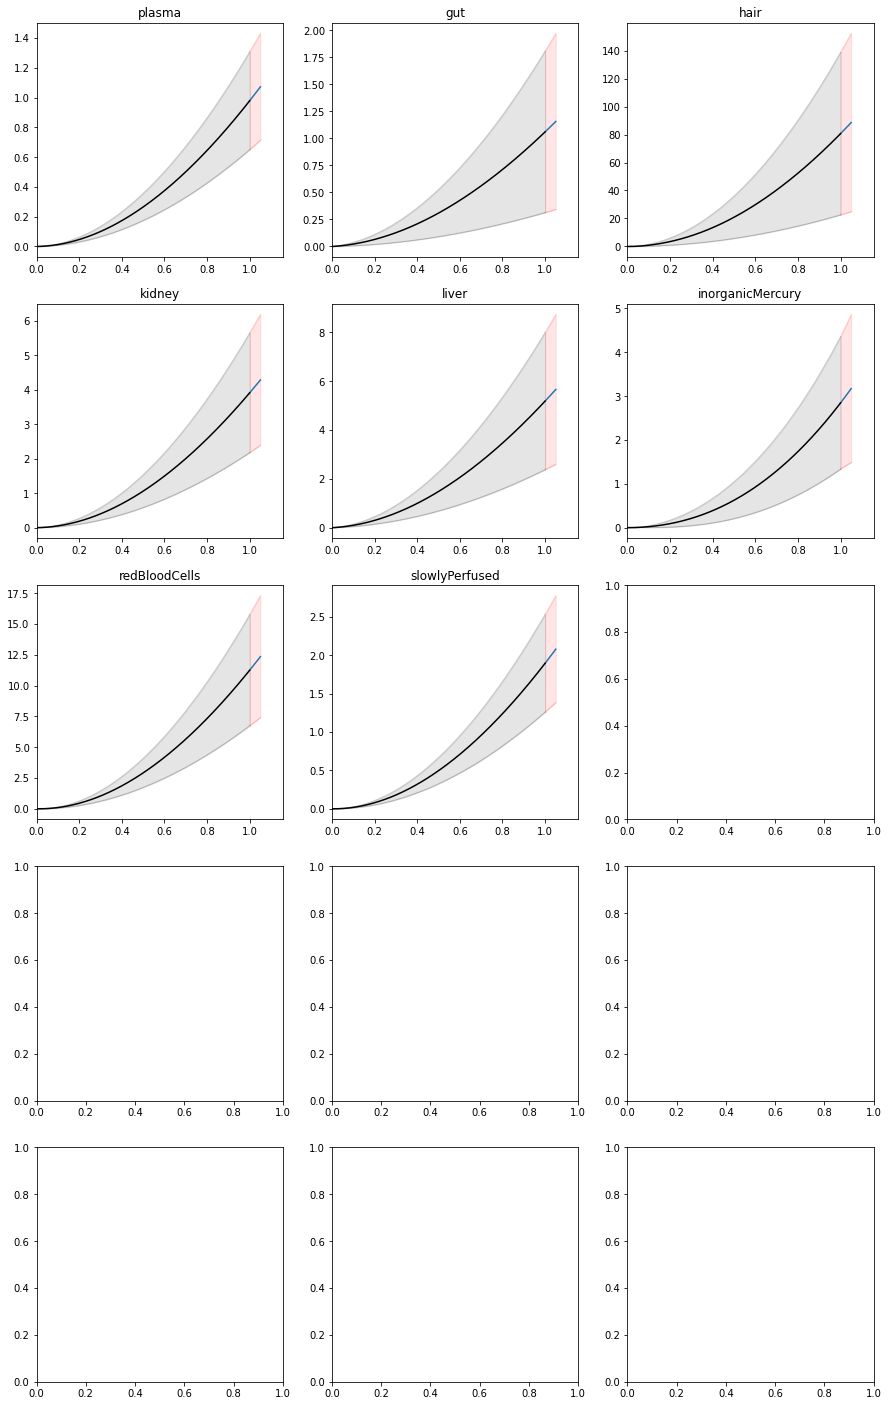

In [95]:
# #copy output of Thompson et al1
# merge solutions 
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,model.lut[name[i]]]
    fe=se[:,model.lut[name[i]]]
    fy1=solOld[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.plot(tOld/tscale,fy1,color='black')
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    ax.fill_between(tOld/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
    ax.plot(tOld/tscale,fy1-fe1,color='black',linewidth=1,alpha=0.2)
    ax.plot(tOld/tscale,fy1+fe1,color='black',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


In [ ]:
# #copy output of Thompson et al1
# draw just the errors
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=se[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(tOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


Drawing kHScaled 6/6


ValueError: x and y must have same first dimension, but have shapes (671,) and (1458,)

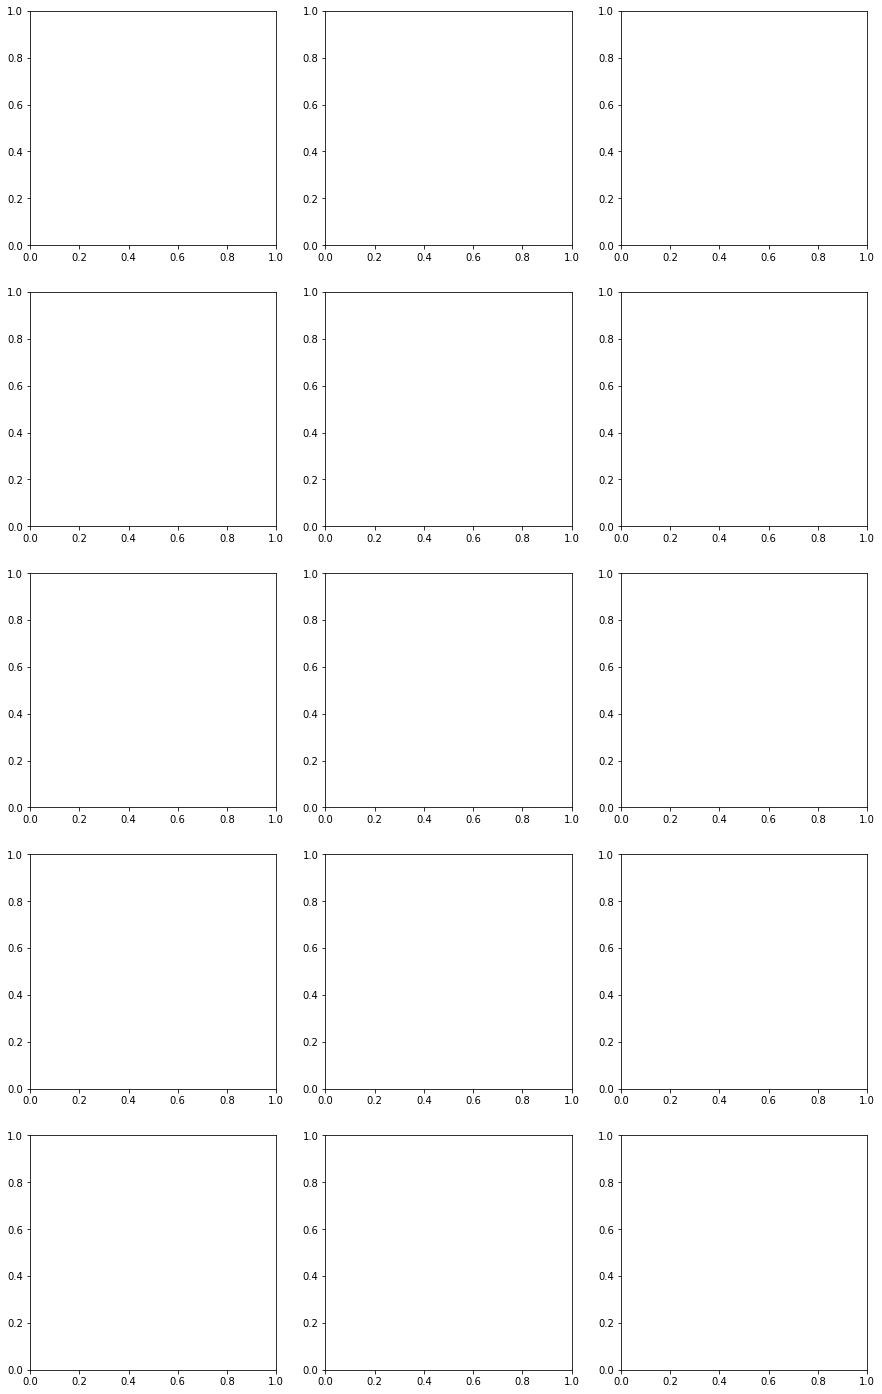

In [120]:
# #copy output of Thompson et al1
#draw error contributions
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
ipar=6

for nm in model.lutSE:
    if model.lutSE[nm]==ipar:
        parName=nm
print('Drawing {} {}/{}'.format(parName,model.lutSE[parName],lutSE[parName]))
        
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=s1[:,model.lut[name[i]],model.lutSE[parName]]
    fe1=s1Old[:,lut[name[i]],lutSE[parName]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(qtOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

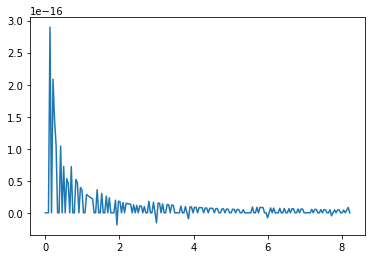

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(model.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248